In [1]:
import lxml.etree as ET
import sys
import os
from io import TextIOWrapper
from random import shuffle as randomsh
import matplotlib.pyplot as plt
import subprocess
import time
import random
import numpy as np
#import matplotlib.image as mpimg
from PIL import Image

In [57]:
# Change data in xml file

def GetGrid(filePath):
    tree = ET.parse(filePath)
    root = tree.getroot()
    map_data = root.find('map')
    width = int(map_data.find('width').text)
    height = int(map_data.find('height').text)
    b_map = np.zeros((height, width), dtype=int)
    grid = map_data.find('grid')
    startX = map_data.find('startx')
    startY = map_data.find('starty')
    finishX = map_data.find('finishx')
    finishY = map_data.find('finishy')
    freeCeils = []
    for i, row in enumerate(grid):
        for j, e in enumerate(row.text.split(' ')):
            if e == '0':
                b_map[i][j] = 0
                freeCeils.append((j, i))
            else: 
                b_map[i][j] = 255
    return b_map
    


    

def ChangeNumberOfstates(filePath: str, numberofstates_, radius_):
    tree = ET.parse(filePath)
    root = tree.getroot()
    algorithm = root.find('algorithm')
    numberofstates = algorithm.find('numberofstates')
    numberofstates.text = numberofstates_
    radius = algorithm.find('radius')
    radius.text = radius_
    tree.write(filePath, pretty_print=True)
    

def ChangeSearchType(filePath: str, searchtype_):
    tree = ET.parse(filePath)
    root = tree.getroot()
    algorithm = root.find('algorithm')
    searchtype = algorithm.find('searchtype')
    searchtype.text = searchtype_
    tree.write(filePath, pretty_print=True)
    
def ChangeToRand(filePath: str):
    tree = ET.parse(filePath)
    root = tree.getroot()
    map_data = root.find('map')
    minDist = max(int(map_data.find('width').text), int(map_data.find('height').text))
    minDist //= 2
    grid = map_data.find('grid')
    startX = map_data.find('startx')
    startY = map_data.find('starty')
    finishX = map_data.find('finishx')
    finishY = map_data.find('finishy')
    freeCeils = []
    for i, row in enumerate(grid):
        for j, e in enumerate(row.text.split(' ')):
            if e == '0':
                freeCeils.append((j, i))
    
    random.shuffle(freeCeils)
    startX_, startY_ = freeCeils[0][0], freeCeils[0][1]
    random.shuffle(freeCeils)
    finishX_, finishY_ = freeCeils[0][0], freeCeils[0][1]
    while (startX_ - finishX_) ** 2 + (startY_ - finishY_) ** 2 < minDist ** 2:
        random.shuffle(freeCeils)
        startX_, startY_ = freeCeils[0][0], freeCeils[0][1]
        random.shuffle(freeCeils)
        finishX_, finishY_ = freeCeils[0][0], freeCeils[0][1]
    startX.text, startY.text = str(startX_), str(startY_)
    finishX.text, finishY.text = str(finishX_), str(finishY_)
    tree.write(filePath, pretty_print=True)
    


In [49]:
#run executable
def process_rstar(path_to_executable, path_map):
    #print("rstar started")

    ChangeSearchType(path_map, "rstar")
    proc = subprocess.Popen([path_to_executable + " " + path_map], shell=True)
    time.sleep(3)
    poll = proc.poll()
    if poll is None:
        #alive
        proc.kill()
        return -1
    else:
        return 0
    
    #proc.wait()
    #print("rstar finished")
    
def process_astar(path_to_executable_astar, path_map):
    #print("astar started")
    ChangeSearchType(path_map, "astar")
    proc1 = subprocess.Popen([path_to_executable_astar + " " + path_map], shell=True)
    time.sleep(3)
    poll = proc1.poll()
    if poll is None:
        #alive
        proc1.kill()
        return -1
    else:
        return 0
    
    #proc1.wait()
    #print("astar finished")
    
def process_rstar_wait(path_to_executable, path_map):
    ChangeSearchType(path_map, "rstar")
    proc = subprocess.Popen([path_to_executable + " " + path_map], shell=True);
    time.sleep(5)
    poll = proc.poll()
    '''
    if poll is None:
        #alive
        proc.kill()
        return -1
    else:
        return 0
    '''
    proc.wait()

In [50]:
#parse data from xml_log
def get_data(filePath: str, algo): # 0 - number of steps, 1 - nudes created, 2 - length, 3 - time
    tree = ET.parse(filePath)
    root = tree.getroot()
    log = root.find('log')
    summary = log.find('summary')
    number_of_steps = float(summary.get('numberofsteps'))
    nodescreated = float(summary.get('nodescreated'))
    length = float(summary.get('length'))
    time = float(summary.get('time'))
    return number_of_steps, nodescreated,  length, time 
    

In [51]:
#getting path to log
def get_path_to_log(path_to_xml: str) :
    return path_to_xml[:-4] + "_log.xml"  

In [52]:
#start testing process
def do_test(path_to_executable_rstar, path_to_executable_astar, path_to_xml, number_of_runs) :
    #pathFileRstar = os.path.normpath(path_to_xml)
    AllDataRstar = []
    AllDataAstar = []
    for i in range(number_of_runs):
        if i == 10:
            print("10 tests passed")
        if i == 50:
            print("50 tests passed")
        if i == 75:
            print("75 tests passed")
        ChangeToRand(path_to_xml)
        is_rstar = process_rstar(path_to_executable_rstar, path_to_xml)
        if (is_rstar != -1):
            datarstar = get_data(get_path_to_log(path_to_xml), "rstar")
            AllDataRstar.append(datarstar)
            #print(datarstar)
        is_astar = process_astar(path_to_executable_astar, path_to_xml)
        if (is_astar != -1):
            dataastar = get_data(get_path_to_log(path_to_xml), "astar")
            AllDataAstar.append(dataastar)
        if (is_rstar != -1 and is_astar != -1):
            AllDataRstar.append(datarstar)
            AllDataAstar.append(dataastar)
        #print(dataastar)
    return AllDataRstar, AllDataAstar
    

In [80]:
def draw_cur(AllData, cur_data) :
    dict = {}
    dict['nodescreated'] = 1
    dict['number of steps'] = 0
    dict['length'] = 2
    dict['time'] = 3
    dataRstar = AllData[0]
    dataAstar = AllData[1]
    num_of_steps_rstar = [100 * dataRstar[item][dict[cur_data]] / dataAstar[item][dict[cur_data]] for item in range(len(dataRstar))]
    num_of_steps_astar = [item[dict[cur_data]] for item in dataAstar]
    width = 1
    fig, ax = plt.subplots()
    rects1 = ax.bar([(float(i) - width) for i in range(1, len(num_of_steps_rstar) + 1)], num_of_steps_rstar, width=width / 2, facecolor='#9999ff', label='R star')
    #rects2 = ax.bar([(float(i) - width / 2) for i in range(1, len(num_of_steps_astar) + 1)], num_of_steps_astar, width=width / 2, facecolor='#ff9999', label='A star')
    plt.axline((0, 100), (1, 100))
    ax.set_ylabel(cur_data)
    ax.set_yscale('log')
    ax.set_title(cur_data)
    ax.set_xticklabels([])
    ax.legend()
    fig.tight_layout()
    plt.show()
    fig, ax = plt.subplots()
    ax.set_yscale('log')
    plt.boxplot(num_of_steps_rstar)
    plt.show()
#draw grid
def draw_image(filePath):
    #path_to_image = path_to_xmł
    #process_rstar_wait(path_to_executable_rstar_visual, path_to_xml)
    #int_slash = path_to_xml[::-1].find('/')
    #path_to_img = path_to_xml[:len(path_to_xml) - int_slash:] + "path_visual.jpg"
    plt.figure(figsize = (11,50))
    imgplot = plt.imshow(GetGrid(path_to_xml))
    

In [86]:
#drawing all data
def draw_data(AllData) : # 0 - number of steps, 1 - nudes created, 2 - length, 3 - time
    draw_cur(AllData, 'nodescreated')
    draw_cur(AllData, 'time')

10 tests passed
50 tests passed
75 tests passed


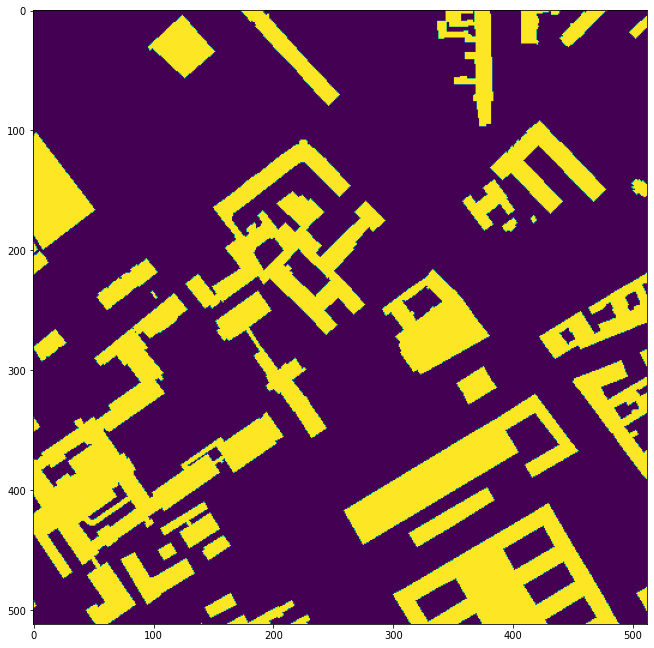

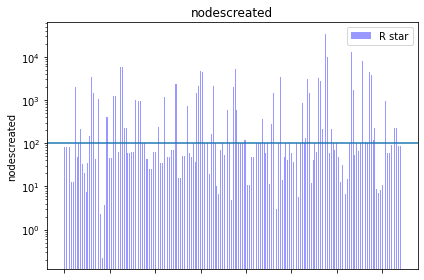

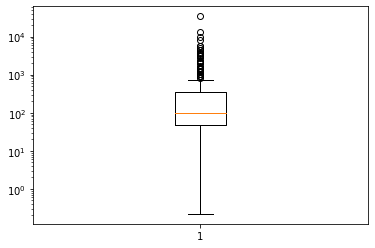

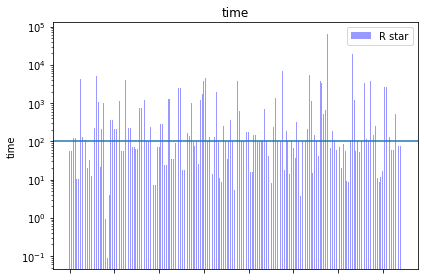

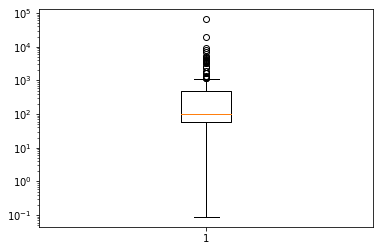

In [82]:
path_to_executable_r_star = "/Users/adilkhankussidenov/Documents/PathPlanning/git_rstar/Rstar_path_planning/Bin/Debug/RstarSearch"
path_to_executable_a_star = "/Users/adilkhankussidenov/Documents/PathPlanning/PathPlanningProject2d/Bin/Debug/Adilkhan_Kussidenov_ASearch"
path_to_xml = "/Users/adilkhankussidenov/Documents/PathPlanning/git_rstar/Rstar_path_planning/Examples/Berlin_512.xml"
draw_image(path_to_xml)
AllData = do_test(path_to_executable_r_star, path_to_executable_a_star, path_to_xml, 100)
draw_data(AllData)

Map brc101d.xml


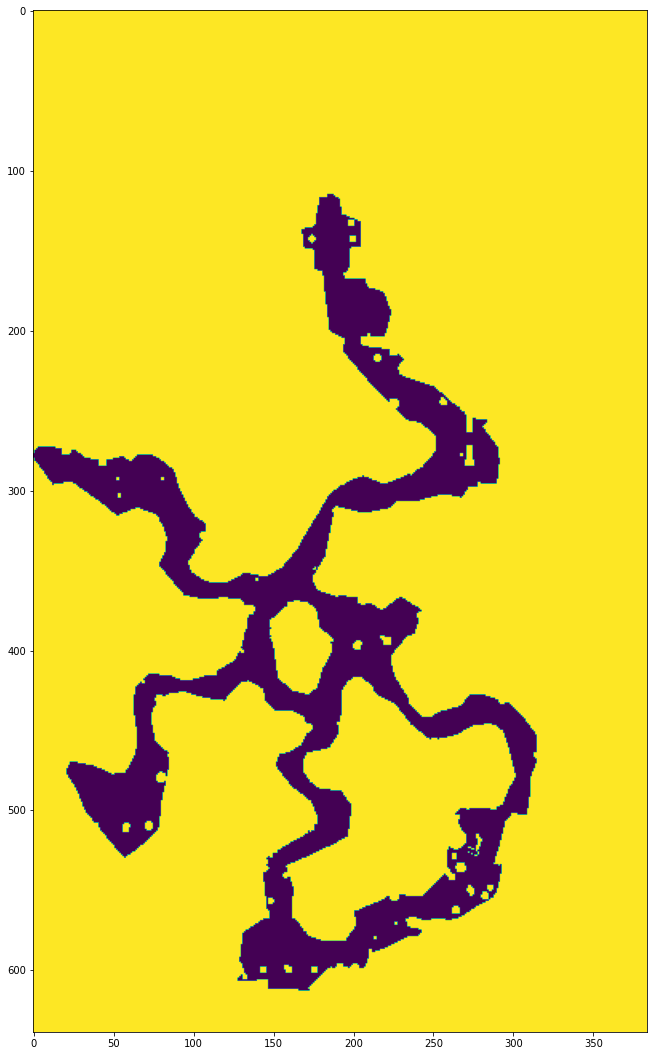

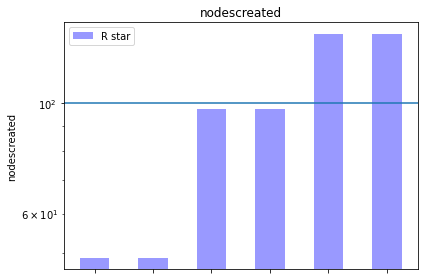

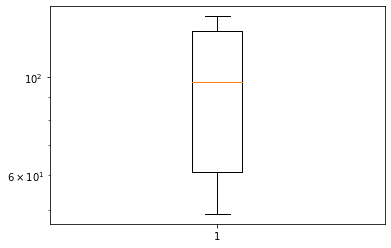

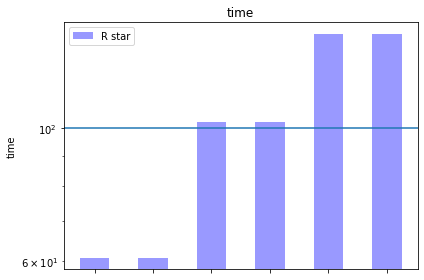

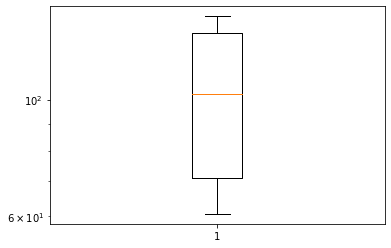

In [85]:
print("Map brc101d.xml")
path_to_executable_r_star = "/Users/adilkhankussidenov/Documents/PathPlanning/git_rstar/Rstar_path_planning/Bin/Debug/RstarSearch"
path_to_executable_a_star = "/Users/adilkhankussidenov/Documents/PathPlanning/PathPlanningProject2d/Bin/Debug/Adilkhan_Kussidenov_ASearch"
path_to_xml = "/Users/adilkhankussidenov/Documents/PathPlanning/git_rstar/Rstar_path_planning/Examples/brc101d.xml"
draw_image(path_to_xml)
AllData = do_test(path_to_executable_r_star, path_to_executable_a_star, path_to_xml, 100)
draw_data(AllData)

Map brc101d.xml


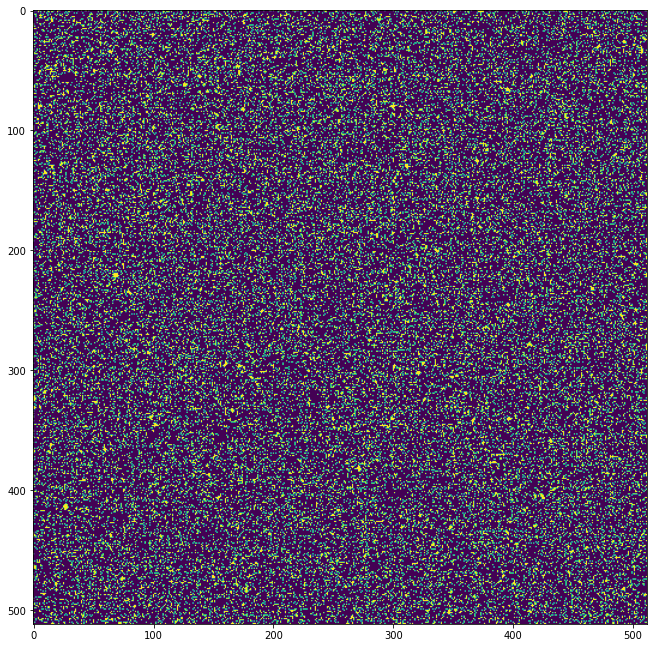

In [87]:
print("Map brc101d.xml")
path_to_executable_r_star = "/Users/adilkhankussidenov/Documents/PathPlanning/git_rstar/Rstar_path_planning/Bin/Debug/RstarSearch"
path_to_executable_a_star = "/Users/adilkhankussidenov/Documents/PathPlanning/PathPlanningProject2d/Bin/Debug/Adilkhan_Kussidenov_ASearch"
path_to_xml = "/Users/adilkhankussidenov/Documents/PathPlanning/git_rstar/Rstar_path_planning/TestData/random-map_xml/random512-20-0_rstar.xml"
draw_image(path_to_xml)
#AllData = do_test(path_to_executable_r_star, path_to_executable_a_star, path_to_xml, 100)
#draw_data(AllData)